In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("src/")
import src.preprocessing.data_loading as data_loading
import numpy as np
from matplotlib import pyplot as plt
import itertools
from functools import partial

from analysis.hit_rate_analysis import (
    seq_contains_12ca5_motif,
    seq_contains_mdm2_motif,
)
from analysis.scatter_plots import (
    plot_relations,
    plot_fancy_hexbin_relations
)

Generating ER datafiles!


In [10]:
protein_of_interest = "MDM2"
other_protein = "12ca5"
hit_func = seq_contains_mdm2_motif if protein_of_interest == "MDM2" else seq_contains_12ca5_motif

X, y_raw, peptides, FEATURE_LIST = data_loading.build_joint_dataset(
    er_datafile =f"{protein_of_interest}_merged_ER.csv",
    volcano_datafile="12ca5-MDM2-R3.csv",
    protein_of_interest=protein_of_interest, 
    other_protein=other_protein
)

/Users/stephen/mambaforge/envs/BiLSTM_new/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:618: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [9]:
y_raw

array([[ 1.23967781,  2.19722458, -1.88358911],
       [12.43071552, -5.97888576, -5.05351412],
       [ 1.25559641,  3.66356165,  0.2318881 ],
       ...,
       [ 0.98376431,  3.13549422, -0.52995216],
       [ 3.89491306,  3.73766962,  0.33880331],
       [ 6.71438825, -4.21950771, -5.05351412]])

## What is the ER / FC / P value Data Distribution Look Like?

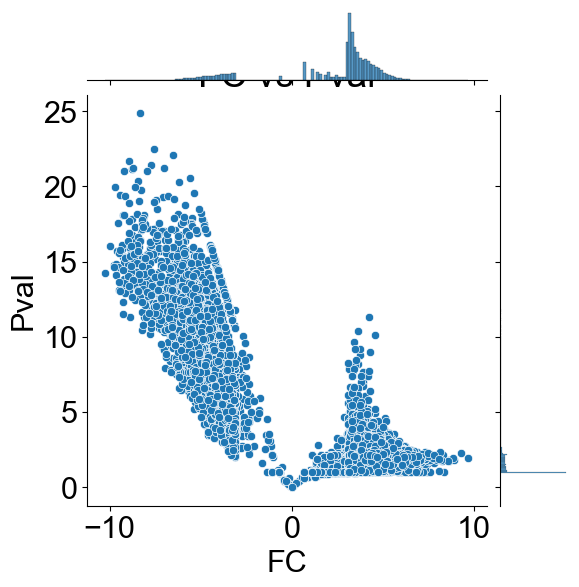

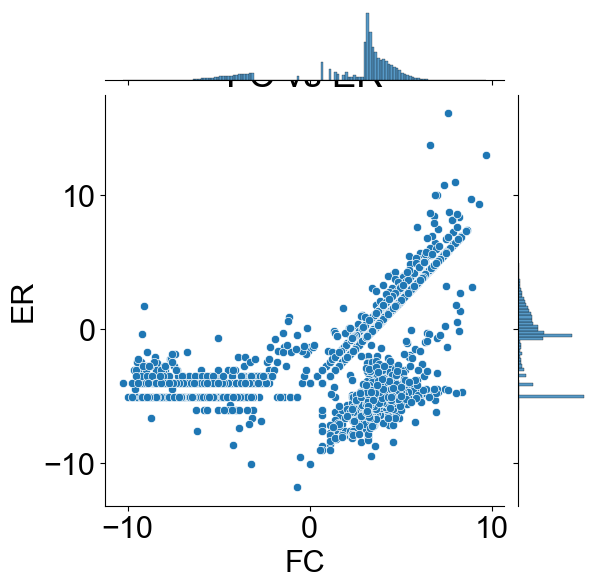

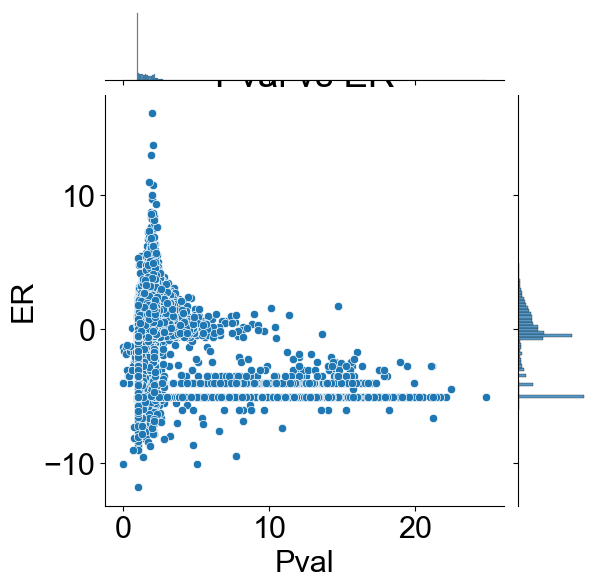

In [11]:
plot_relations(x_idx=1, y_idx=0, datapoints=y_raw, ordering=None, all_positives=None, kind='scatter')
plot_relations(x_idx=1, y_idx=2, datapoints=y_raw, ordering=None, all_positives=None, kind='scatter')
plot_relations(x_idx=0, y_idx=2, datapoints=y_raw, ordering=None, all_positives=None, kind='scatter')


## Where are the true hits (defined by motif) in our dataset?

(-11.26699745539576, 12.802835987110129, -0.8329379238887278, 27.369964117469774)


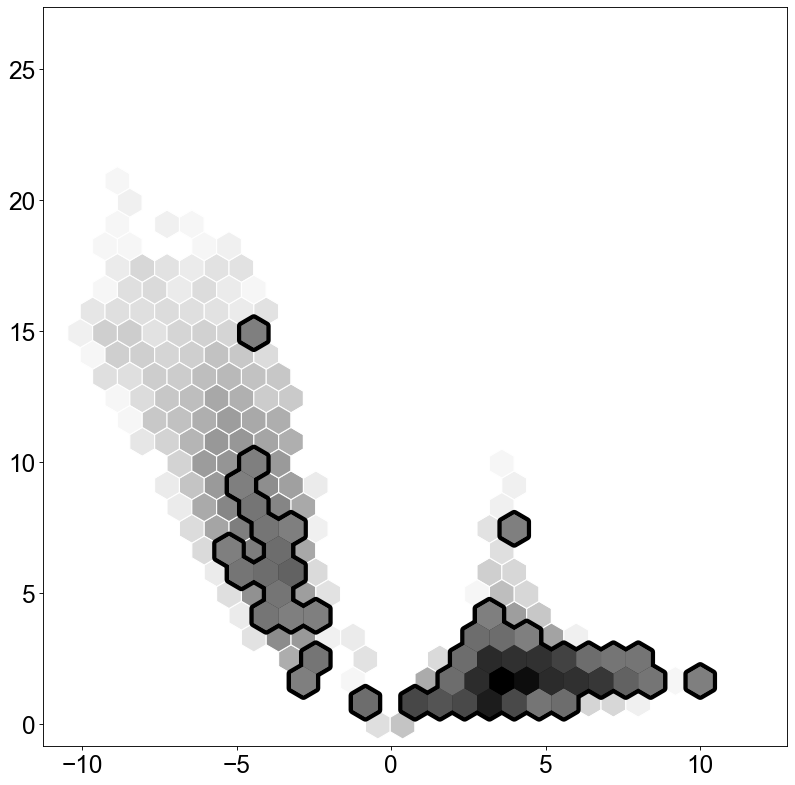

(-11.26699745539576, 12.802835987110129, -12.424972942105276, 18.0343835663439)


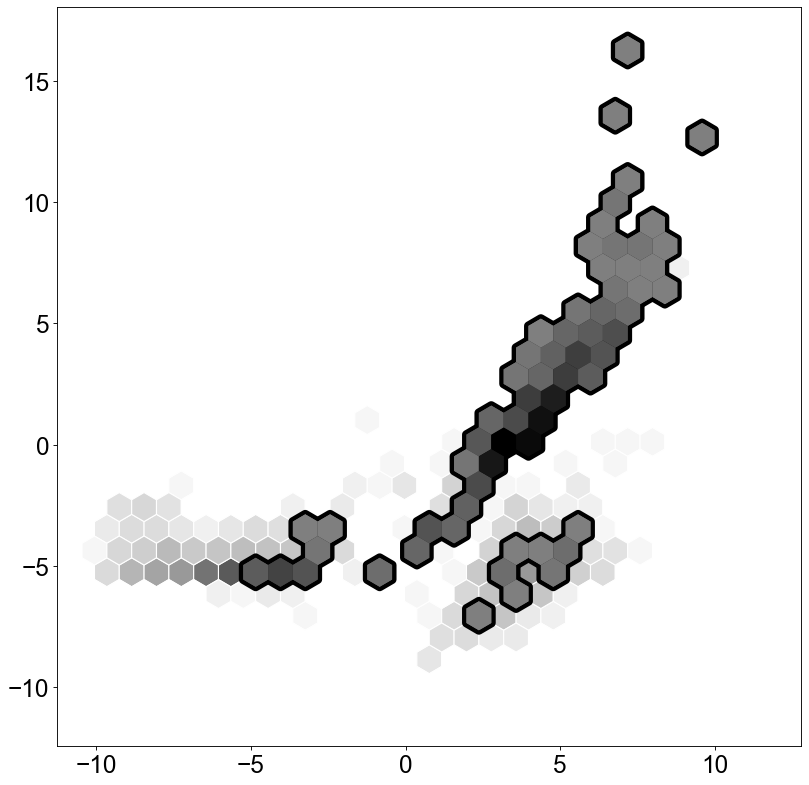

(-0.8329379238887278, 27.369964117469774, -12.424972942105276, 18.0343835663439)


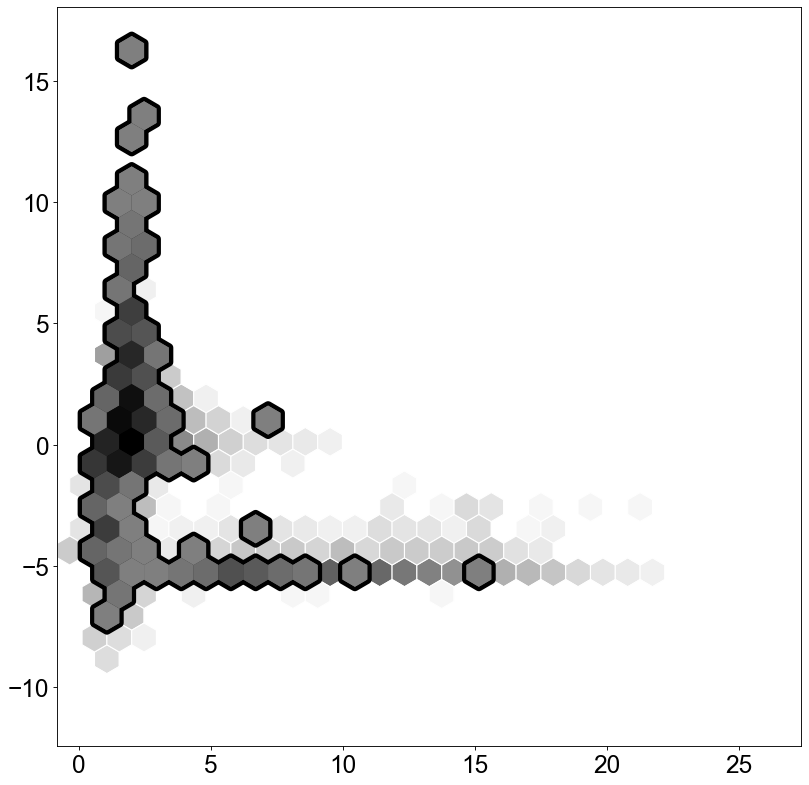

In [12]:
hypothetical_best_ordering = np.array([ 1.0 if hit_func(pep) else 0.0 for pep in peptides])


plot_fancy_hexbin_relations(
    1,
    0,
    datapoints=y_raw,
    ordering=hypothetical_best_ordering,
    all_positives=None,
    title='',
    plot_labels=False,
)
plot_fancy_hexbin_relations(
    1,
    2,
    datapoints=y_raw,
    ordering=hypothetical_best_ordering,
    all_positives=None,
    title='',
    plot_labels=False,
)
plot_fancy_hexbin_relations(
    0,
    2,
    datapoints=y_raw,
    ordering=hypothetical_best_ordering,
    all_positives=None,
    title='',
    plot_labels=False,
)

